<a href="https://colab.research.google.com/github/ElizabethCBG/Flavors_data_analysis/blob/main/Estadistica_descriptiva1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('ds_salaries.csv',delimiter=',')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Se busca realizar una analisis estdístico de los salarios ,considerando:

1.El promedio general de los salarios,desviacion estándar,quintiles y rango

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
#Media
media_salary=df['salary'].mean()  # Media
media_salary

np.float64(190695.57177097205)

In [ ]:
#Media
media_salary_in_usd=df['salary_in_usd'].mean()  # Media
media_salary_in_usd

np.float64(137570.38988015978)

In [ ]:
#Desviacion estandar
desviacion_estandar_salary = df['salary'].std()  # Desviación estándar
desviacion_estandar_salary

671676.5005079071

In [ ]:
#Desviacion estandar
desviacion_estandar_salary_in_usd = df['salary_in_usd'].std()  # Desviación estándar
desviacion_estandar_salary_in_usd

63055.625278224084

In [ ]:
#Quintiles
quintil1=df['salary'].quantile(0.2)
print(quintil1)
quintil2=df['salary'].quantile(0.4)
print(quintil2)
quintil3=df['salary'].quantile(0.6)
print(quintil3)
quintil4=df['salary'].quantile(0.8)
print(quintil4)




85000.0
123628.8
150000.0
191475.0


In [ ]:
#Rango
minimo = df['salary'].min()  # Valor mínimo
print(minimo)
maximo = df['salary'].max()  # Valor mínimo
print(maximo)
rango= maximo-minimo
print(rango)

6000
30400000
30394000


In [ ]:
#Estadistica descriptiva
df['salary'].head()
df['salary'].describe()

,salary
count,3.755000e+03
mean,1.906956e+05
std,6.716765e+05
min,6.000000e+03
25%,1.000000e+05
50%,1.380000e+05
75%,1.800000e+05
max,3.040000e+07


Una comparacion entre los salarios agurpados por 3 diferentes categorias a tu eleccion ¿Para cual de ellas las medidas de tendencia central son mas representativas?¿Para cual son menos representativas?

In [ ]:
# Crear los 3 grupos
df['salary_categorias'] = pd.qcut(df['salary'], 3, labels=['Bajo', 'Medio', 'Alto'])

In [ ]:
# Estadistica para cada grupo
grupos = df.groupby('salary_categorias')

resultado = grupos['salary'].agg([
    'count', 'mean', 'median',
    lambda x: x.mode().iloc[0] if len(x.mode())>0 else None
])

resultado.rename(columns={'<lambda_0>': 'mode'}, inplace=True)
print(resultado)

                   count           mean    median    mode
salary_categorias                                        
Bajo                1258   75315.813990   80000.0  100000
Medio               1247  137587.842021  138600.0  150000
Alto                1250  359794.031200  200000.0  200000


/tmp/ipython-input-214446865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = df.groupby('salary_categorias')


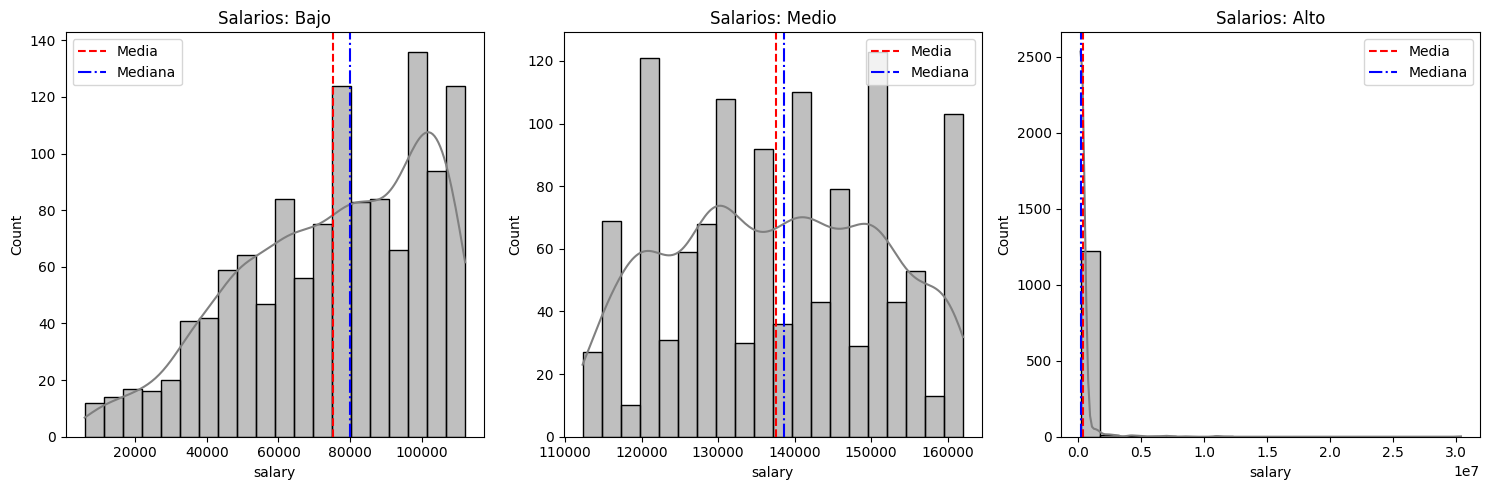

In [ ]:

#Histograma para cada grupo
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

categorias = ['Bajo', 'Medio', 'Alto']

for ax, categoria in zip(axes, categorias):
    subset = df[df['salary_categorias'] == categoria]['salary']
    sns.histplot(subset, bins=20, kde=True, ax=ax, color='gray')
    ax.set_title(f'Salarios: {categoria}')
    ax.axvline(subset.mean(), color='red', linestyle='--', label='Media')
    ax.axvline(subset.median(), color='blue', linestyle='-.', label='Mediana')
    ax.legend()

plt.tight_layout()
plt.show()

Segun el grafico las medidas de etencencia central serian mas ssignificativas para el grupo de salario que se encuentra en el medio ,dado que hay una concentracion mas equitativa que se ajusta a la media

In [ ]:
#Cragos en estados unidos
df_us = df[df['company_location'] == 'US']

# Agrupar las posiciones y salarios
salarios_por_posicion = (
    df_us.groupby('job_title')['salary']
         .mean()
         .sort_values(ascending=False)
)

print(salarios_por_posicion)

job_title
BI Data Analyst                      1.910000e+06
Data Analytics Lead                  4.050000e+05
Data Science Tech Lead               3.750000e+05
Director of Data Science             2.943750e+05
Data Science Manager                 2.752624e+05
                                         ...     
Data Quality Analyst                 8.286333e+04
Data Analytics Consultant            8.150000e+04
Computer Vision Software Engineer    7.550000e+04
Big Data Engineer                    7.000000e+04
BI Data Engineer                     6.000000e+04
Name: salary, Length: 70, dtype: float64


El cargo que recibe mejor ssueldo es el de BI Data Engineer